In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
import skops.io as sio

# Charger Iris

In [2]:
iris_df = pd.read_csv("Data/iris.csv")
iris_df = iris_df.sample(frac=1)
print(iris_df.head(3))

     Dsepal_length  sepal_width  petal_length  petal_width     species
76             6.8          2.8           4.8          1.4  versicolor
22             4.6          3.6           1.0          0.2      setosa
125            7.2          3.2           6.0          1.8   virginica


# Prepare data

In [3]:
X = iris_df.drop("species", axis=1).values
y = iris_df.species.values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=125
)


# Define pipeline

In [4]:
num_col = [0,1,2,3]

pipe = Pipeline(
    steps=[
        ("num_imputer", SimpleImputer(strategy="median")),
        ("num_scaler", StandardScaler()),
        ("model", RandomForestClassifier(n_estimators=10, random_state=125)),
    ]
)
pipe.fit(X_train, y_train)

Pipeline(steps=[('num_imputer', SimpleImputer(strategy='median')),
                ('num_scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(n_estimators=10, random_state=125))])

# Evaluate

In [5]:
predictions = pipe.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average="macro")

print("Accuracy: ", str(round(accuracy, 2) * 100) + "%", "F1: ", round(f1, 2))

Accuracy:  93.0% F1:  0.93


# Write metrics to file

In [6]:
with open("Results/metrics.txt", "w") as outfile:
    outfile.write(f"\nAccuracy = {round(accuracy,2)}, F1 Score = {round(f1,2)}.")

# Confusion matrix

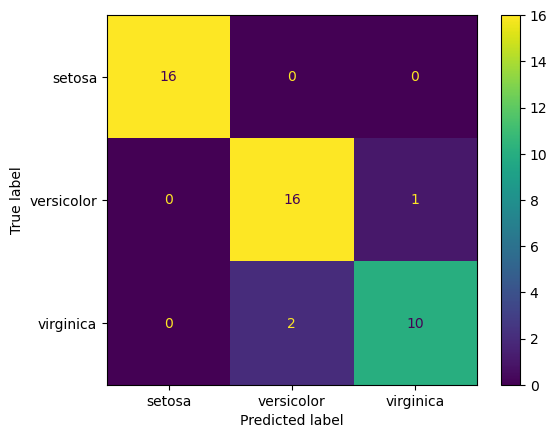

In [7]:
cm = confusion_matrix(y_test, predictions, labels=pipe.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
disp.plot()
plt.savefig("Results/model_results.png", dpi=120)

# Save model

In [8]:
sio.dump(pipe, "Model/iris_pipeline.skops")

# Load model (for verification)

In [12]:

# Option 1: Load the file first, then check untrusted types
untrusted = sio.get_untrusted_types(file="Model/iris_pipeline.skops")
print(untrusted)

# Option 2: If you want to inspect before loading
with open("Model/iris_pipeline.skops", "rb") as f:
    untrusted = sio.get_untrusted_types(file=f)
    print(untrusted)

['numpy.dtype']
['numpy.dtype']


In [14]:
# Load the model, trusting specific types if needed
model = sio.load("Model/iris_pipeline.skops", trusted=untrusted)
model

Pipeline(steps=[('num_imputer', SimpleImputer(strategy='median')),
                ('num_scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(n_estimators=10, random_state=125))])